# Reference
1. [Prophet model](https://facebook.github.io/prophet/).
2. [SP 500 data](https://www.marketwatch.com/investing/index/spx/download-data?startDate=2/24/2020&endDate=02/23/2022).

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
%cd drive/MyDrive/Colab\ Notebooks/

/content/drive/MyDrive/Colab Notebooks


In [8]:
pwd

'/content/drive/MyDrive/Colab Notebooks'

In [9]:
!git init RedOrGreen

Initialized empty Git repository in /content/drive/MyDrive/Colab Notebooks/RedOrGreen/.git/


# Set up the environment

In [ ]:
# download and install useful packages
!pip install prophet
!pip install plotly==4.0
!pip install notebook
!pip install ipywidgets

In [ ]:
# import useful packages
import pandas as pd
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly

# Read and clean the data

`SP_500_1.csv` contains the SP 500 price from 2020-02-24 to 2021-02-22. `SP_500_2.csv` contains the SP 500 price from 2021-02-23 to 2022-02-23. 

In [ ]:
sp_500_1 = pd.read_csv('SP_500_1.csv')
sp_500_2 = pd.read_csv('SP_500_2.csv')

In [ ]:
sp_500_1

,Date,Open,High,Low,Close
0,2/22/2021,"3,885.55","3,902.92","3,874.71","3,876.50"
1,2/19/2021,"3,921.16","3,930.41","3,903.07","3,906.71"
2,2/18/2021,"3,915.86","3,921.98","3,885.03","3,913.97"
3,2/17/2021,"3,918.50","3,933.61","3,900.43","3,931.33"
4,2/16/2021,"3,939.61","3,950.43","3,923.85","3,932.59"
...,...,...,...,...,...
247,2/28/2020,"2,916.90","2,959.72","2,855.84","2,954.22"
248,2/27/2020,"3,062.54","3,097.07","2,977.39","2,978.76"
249,2/26/2020,"3,139.90","3,182.51","3,108.99","3,116.39"
250,2/25/2020,"3,238.94","3,246.99","3,118.77","3,128.21"


In [ ]:
# convert Date strings to pandas datetime objects
sp_500_1['Date'] = pd.to_datetime(sp_500_1['Date'])
sp_500_2['Date'] = pd.to_datetime(sp_500_2['Date'])

In [ ]:
# the variable we want to model/predict
response = 'Close' 

# convert the data to the form that can be accepted by Prophet object
sp_500_df = pd.concat([sp_500_2, sp_500_1], axis = 0).iloc[::-1]
sp_500_df = sp_500_df.reset_index().drop('index', axis=1)
sp_500_df = sp_500_df.rename({'Date':'ds', response:'y'}, axis=1)[['ds', 'y']]
sp_500_df['y'] = sp_500_df['y'].str.replace(',','').astype('float64')
sp_500_df

,ds,y
0,2020-02-24,3225.89
1,2020-02-25,3128.21
2,2020-02-26,3116.39
3,2020-02-27,2978.76
4,2020-02-28,2954.22
...,...,...
501,2022-02-16,4475.01
502,2022-02-17,4380.26
503,2022-02-18,4348.87
504,2022-02-22,4304.76


# Build and fit the model

In [ ]:
# create and fit a Prophet time series model
sp_500_model = Prophet()
sp_500_model.fit(sp_500_df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


# Forecast

In [ ]:
# add future time indices
num_future_days = 10
future = sp_500_model.make_future_dataframe(num_future_days)

Notice that the specific dates of time indices are meaningless, as `2022-02-26` and `2022-02-27` are weekend. We should only care about the order of these time indices.

In [ ]:
# future dates
future.tail(num_future_days)

,ds
506,2022-02-24
507,2022-02-25
508,2022-02-26
509,2022-02-27
510,2022-02-28
511,2022-03-01
512,2022-03-02
513,2022-03-03
514,2022-03-04
515,2022-03-05


In [ ]:
# predict
forecast = sp_500_model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(num_future_days)


,ds,yhat,yhat_lower,yhat_upper
506,2022-02-24,4376.344078,4299.885448,4457.318463
507,2022-02-25,4367.387627,4287.430783,4445.655137
508,2022-02-26,4363.007403,4280.164770,4444.290662
509,2022-02-27,4350.912581,4268.584491,4434.925407
510,2022-02-28,4332.593578,4251.924239,4417.173631
511,2022-03-01,4321.394652,4237.637190,4410.839919
512,2022-03-02,4306.387922,4230.698431,4385.319809
513,2022-03-03,4286.624049,4207.570933,4371.916372
514,2022-03-04,4272.543783,4194.673207,4346.390931
515,2022-03-05,4263.370319,4181.337400,4348.660166


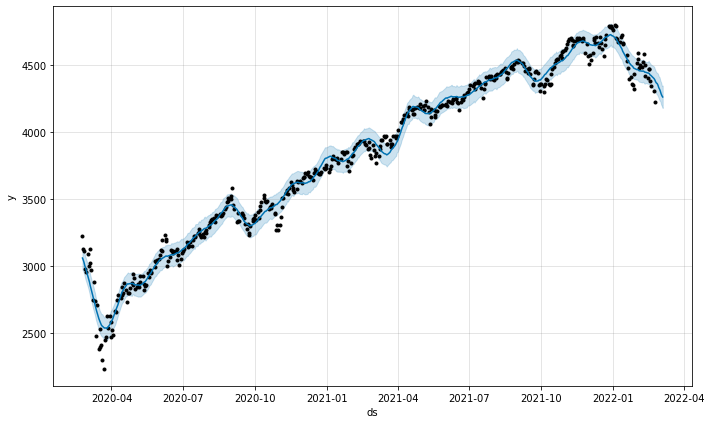

In [ ]:
# plot the past and predicted SP 500 price
fig1 = sp_500_model.plot(forecast)

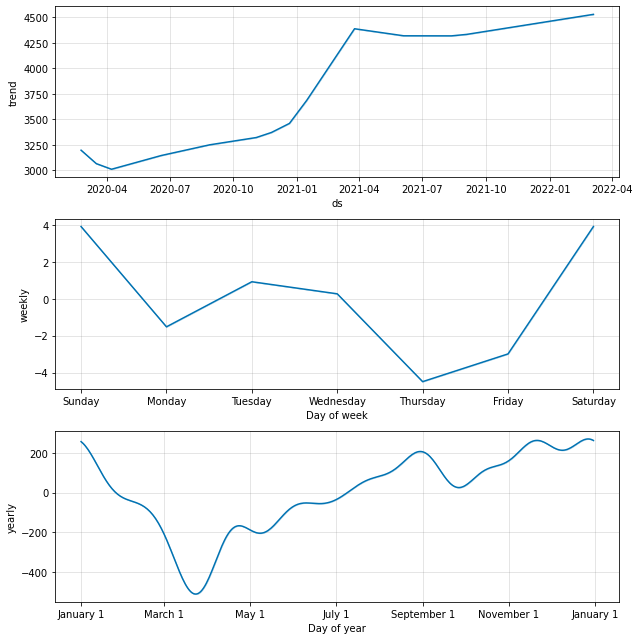

In [ ]:
# plot the trend, yearly seasonality, and weekly seasonality components of our Prophet model
fig2 = sp_500_model.plot_components(forecast)

Here are some interactive plots to you can play with.

In [ ]:
plot_plotly(sp_500_model, forecast)

In [ ]:
plot_components_plotly(sp_500_model, forecast)

# Potential issue
1. The time indices of stock price data are not daily continuous.
2. Use wider range of SP 500? Now the starting point if the breakout of the pandemic. 